<a href="https://colab.research.google.com/github/Maternowsky/Maternowsky/blob/main/Perceptron_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data Set**

In [2]:
from sklearn import datasets
import numpy as np

In [9]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))



Class labels: [0 1 2]


# **Split to test and train data sets**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1,stratify = y)

## **checking stratification of train_test_split using np.bincount()**

In [11]:
print("Labels counts in y: ", np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test: ', np.bincount(y_test))

Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


## **impimenting feature scaling for optimal performance**

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
# using the fit method StandardScaler estimated the parameters,(sample mean) and
#(standard deviation) for each feature dimension from the training data

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# by calling the transform method, we then standardized the training data using
#those estimated parameters, μ and σ

                          

## **importing Perceptron with one-versus-rest (OvR) by default**

In [15]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

# **Making prediction using predict method**

In [16]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())


# misclassification error is 2.2% or 1 out of 45 flowers

Misclassified examples: 1


In [17]:
#calculate the calssification accuracy 

from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.978


# **Plotting results with matplotlib**

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() +1
  x2_min, x2_max = X[:, 1].min() -1, X[:,0].max() +1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0],
                y=X[y==cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = f'Class {cl}',
                edgecolor = 'black')
    if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0 ], X_test[:, 1],
                  c = 'none', edgecolor='black',
                  alpha = 1.0, linewidth = 1,
                  marker = 'o', s=100,
                  label = 'Test set')

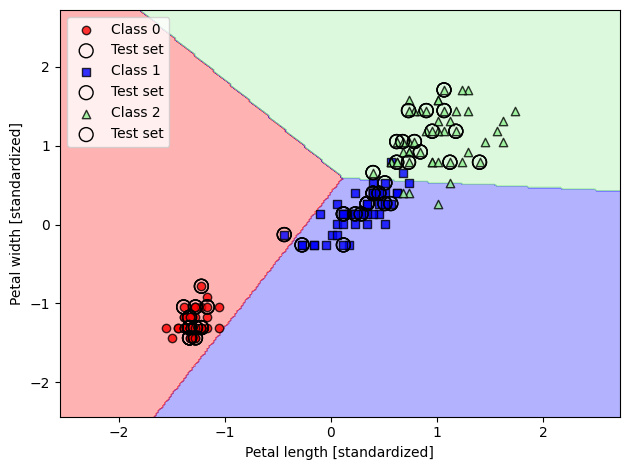

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,
                      y = y_combined,
                      classifier = ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()